In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print (coordinates)

[(-21.645906382836955, -178.3261377359092), (-80.99612024007983, 173.17745494978544), (-33.61181082055674, 71.30390445283348), (-46.350491651808376, 170.0968913843077), (-44.22148891357462, -0.5332897823681435), (88.06788519860928, 153.82790537077045), (-23.65291435084943, 132.41412920509737), (82.95956466194747, 31.776548102967553), (14.494645204505716, -121.3741446080605), (26.299362844272252, -124.16079599788614), (3.135962047459273, -8.211592474579419), (-43.53307423444865, 152.13220164297235), (87.36453402792688, 143.8945094866682), (-26.095415187626273, 61.436667324469994), (37.84088528198285, 111.2180233289879), (-17.884285017959883, -155.8164747048241), (31.117521336832567, 121.38936407834359), (7.72219280427511, 89.8228653888849), (-78.71751587270901, 70.92300640871872), (-15.95950962195657, -147.19711143583095), (-63.73369122486225, 77.06372534412776), (59.44835685406028, -118.24001665439114), (-19.77132142370867, 81.9125728056456), (-43.90668035719105, -8.417881480589813), (

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-21.645906382836955 -178.3261377359092
-80.99612024007983 173.17745494978544
-33.61181082055674 71.30390445283348
-46.350491651808376 170.0968913843077
-44.22148891357462 -0.5332897823681435
88.06788519860928 153.82790537077045
-23.65291435084943 132.41412920509737
82.95956466194747 31.776548102967553
14.494645204505716 -121.3741446080605
26.299362844272252 -124.16079599788614
3.135962047459273 -8.211592474579419
-43.53307423444865 152.13220164297235
87.36453402792688 143.8945094866682
-26.095415187626273 61.436667324469994
37.84088528198285 111.2180233289879
-17.884285017959883 -155.8164747048241
31.117521336832567 121.38936407834359
7.72219280427511 89.8228653888849
-78.71751587270901 70.92300640871872
-15.95950962195657 -147.19711143583095
-63.73369122486225 77.06372534412776
59.44835685406028 -118.24001665439114
-19.77132142370867 81.9125728056456
-43.90668035719105 -8.417881480589813
36.632294964743764 -98.00920048227421
56.21352150980084 -66.62395151457414
-49.284152078389226 119

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


In [10]:
cities

['vaini',
 'bluff',
 'mahebourg',
 'kaitangata',
 'cape town',
 'chokurdakh',
 'alice springs',
 'berlevag',
 'cabo san lucas',
 'lompoc',
 'harper',
 'hobart',
 'jiexiu',
 'vaitape',
 'shanghai',
 'port blair',
 'taolanaro',
 'tautira',
 'souillac',
 'high level',
 'hithadhoo',
 'jamestown',
 'enid',
 'sept-iles',
 'albany',
 'barrow',
 'mount isa',
 'solnechnogorsk',
 'belushya guba',
 'fortuna',
 'rikitea',
 'kruisfontein',
 'luderitz',
 'mossendjo',
 'teguise',
 'tunduru',
 'punta arenas',
 'ahipara',
 'kapaa',
 'georgetown',
 'yellowknife',
 'ancud',
 'vao',
 'qaanaaq',
 'abu jubayhah',
 'mataura',
 'erzin',
 'turinsk',
 'kavaratti',
 'illoqqortoormiut',
 'atexcatzingo',
 'ostrovnoy',
 'altamira',
 'portland',
 'isangel',
 'thompson',
 'panaba',
 'kosh-agach',
 'ushuaia',
 'ribeira grande',
 'provideniya',
 'dickson',
 'kuusamo',
 'dongying',
 'saldanha',
 'khatanga',
 'ixtapa',
 'bijie',
 'saint anthony',
 'baykit',
 'ilulissat',
 'sao joao da barra',
 'hermanus',
 'port alfred',

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
      
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | bluff
Processing Record 3 of Set 13 | mahebourg
Processing Record 4 of Set 13 | kaitangata
Processing Record 5 of Set 13 | cape town
Processing Record 6 of Set 13 | chokurdakh
Processing Record 7 of Set 13 | alice springs
Processing Record 8 of Set 13 | berlevag
Processing Record 9 of Set 13 | cabo san lucas
Processing Record 10 of Set 13 | lompoc
Processing Record 11 of Set 13 | harper
Processing Record 12 of Set 13 | hobart
Processing Record 13 of Set 13 | jiexiu
Processing Record 14 of Set 13 | vaitape
Processing Record 15 of Set 13 | shanghai
Processing Record 16 of Set 13 | port blair
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | tautira
Processing Record 19 of Set 13 | souillac
Processing Record 20 of Set 13 | high level
Processing Record 21 of Set 13 | hithadhoo
Processing Record 22 of Set 13 | jamestown
Processing Record 23 of Set 13 | enid
Processing 

Processing Record 36 of Set 16 | qiqihar
Processing Record 37 of Set 16 | ravar
Processing Record 38 of Set 16 | ust-omchug
Processing Record 39 of Set 16 | quelimane
Processing Record 40 of Set 16 | umm lajj
Processing Record 41 of Set 16 | marcona
City not found. Skipping...
Processing Record 42 of Set 16 | vardo
Processing Record 43 of Set 16 | leh
Processing Record 44 of Set 16 | pimenta bueno
Processing Record 45 of Set 16 | dzerzhinskoye
Processing Record 46 of Set 16 | pindiga
Processing Record 47 of Set 16 | churapcha
Processing Record 48 of Set 16 | gizo
Processing Record 49 of Set 16 | padilla
Processing Record 50 of Set 16 | lovozero
Processing Record 1 of Set 17 | bay roberts
Processing Record 2 of Set 17 | zhigalovo
Processing Record 3 of Set 17 | santa lucia
Processing Record 4 of Set 17 | nouadhibou
Processing Record 5 of Set 17 | nome
Processing Record 6 of Set 17 | banamba
Processing Record 7 of Set 17 | payo
Processing Record 8 of Set 17 | zverinogolovskoye
Processing

Processing Record 21 of Set 20 | camana
Processing Record 22 of Set 20 | yumbe
Processing Record 23 of Set 20 | hovd
Processing Record 24 of Set 20 | vila velha
Processing Record 25 of Set 20 | cockburn town
Processing Record 26 of Set 20 | mayo
Processing Record 27 of Set 20 | ulladulla
Processing Record 28 of Set 20 | ostersund
Processing Record 29 of Set 20 | watsa
Processing Record 30 of Set 20 | karauzyak
City not found. Skipping...
Processing Record 31 of Set 20 | meulaboh
Processing Record 32 of Set 20 | oneonta
Processing Record 33 of Set 20 | waw
Processing Record 34 of Set 20 | richards bay
Processing Record 35 of Set 20 | tecoanapa
Processing Record 36 of Set 20 | comodoro rivadavia
Processing Record 37 of Set 20 | springbok
Processing Record 38 of Set 20 | riyadh
Processing Record 39 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 20 | abu zabad
Processing Record 41 of Set 20 | lentvaris
Processing Record 42 of Set 20 | kavieng
Processing R

Processing Record 9 of Set 24 | mackay
Processing Record 10 of Set 24 | pakxan
Processing Record 11 of Set 24 | benjamin hill
Processing Record 12 of Set 24 | durango
Processing Record 13 of Set 24 | baoqing
Processing Record 14 of Set 24 | jumla
Processing Record 15 of Set 24 | rawson
Processing Record 16 of Set 24 | mporokoso
Processing Record 17 of Set 24 | iquique
Processing Record 18 of Set 24 | emba
Processing Record 19 of Set 24 | truro
Processing Record 20 of Set 24 | ugoofaaru
Processing Record 21 of Set 24 | barra do garcas
Processing Record 22 of Set 24 | agnibilekrou
Processing Record 23 of Set 24 | henties bay
Processing Record 24 of Set 24 | cahokia
Processing Record 25 of Set 24 | mocambique
City not found. Skipping...
Processing Record 26 of Set 24 | killybegs
Processing Record 27 of Set 24 | yabelo
Processing Record 28 of Set 24 | toliary
City not found. Skipping...
Processing Record 29 of Set 24 | saint-pierre
Processing Record 30 of Set 24 | kondinskoye
Processing Re

In [12]:
len(city_data)

565

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,78.96,89,75,6.91,TO,2022-11-10 04:07:29
1,Bluff,-46.6000,168.3333,58.80,64,0,17.20,NZ,2022-11-10 04:07:30
2,Mahebourg,-20.4081,57.7000,78.26,65,20,6.91,MU,2022-11-10 04:04:41
3,Kaitangata,-46.2817,169.8464,55.99,61,0,11.97,NZ,2022-11-10 04:07:30
4,Cape Town,-33.9258,18.4232,60.91,69,0,8.99,ZA,2022-11-10 04:02:21
5,Chokurdakh,70.6333,147.9167,-9.63,99,100,8.32,RU,2022-11-10 04:07:31
6,Alice Springs,-23.7000,133.8833,94.55,21,18,14.97,AU,2022-11-10 04:07:31
7,Berlevag,70.8578,29.0864,33.80,86,100,5.75,NO,2022-11-10 04:07:31
8,Cabo San Lucas,22.8909,-109.9124,76.60,68,48,5.01,MX,2022-11-10 04:06:13
9,Lompoc,34.6391,-120.4579,51.01,83,0,9.22,US,2022-11-10 04:07:32


In [14]:
new_city_data_order= ['City', 'Country', 'Date', 'Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']

In [15]:
new_city_data_order_df= city_data_df[new_city_data_order]
new_city_data_order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-11-10 04:07:29,-21.2000,-175.2000,78.96,89,75,6.91
1,Bluff,NZ,2022-11-10 04:07:30,-46.6000,168.3333,58.80,64,0,17.20
2,Mahebourg,MU,2022-11-10 04:04:41,-20.4081,57.7000,78.26,65,20,6.91
3,Kaitangata,NZ,2022-11-10 04:07:30,-46.2817,169.8464,55.99,61,0,11.97
4,Cape Town,ZA,2022-11-10 04:02:21,-33.9258,18.4232,60.91,69,0,8.99
5,Chokurdakh,RU,2022-11-10 04:07:31,70.6333,147.9167,-9.63,99,100,8.32
6,Alice Springs,AU,2022-11-10 04:07:31,-23.7000,133.8833,94.55,21,18,14.97
7,Berlevag,NO,2022-11-10 04:07:31,70.8578,29.0864,33.80,86,100,5.75
8,Cabo San Lucas,MX,2022-11-10 04:06:13,22.8909,-109.9124,76.60,68,48,5.01
9,Lompoc,US,2022-11-10 04:07:32,34.6391,-120.4579,51.01,83,0,9.22


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1668053471.03471

In [19]:
# Use string format method to reformat the datetime stamp
today = time.strftime("%x")
today

'11/09/22'

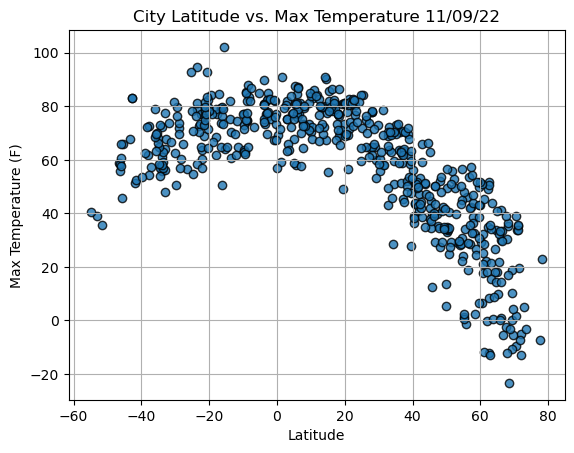

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

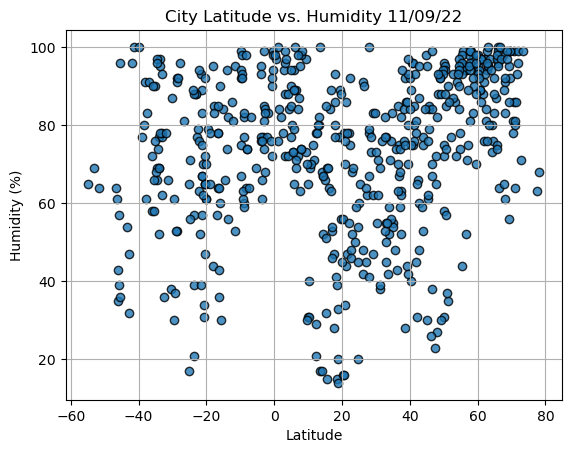

In [21]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

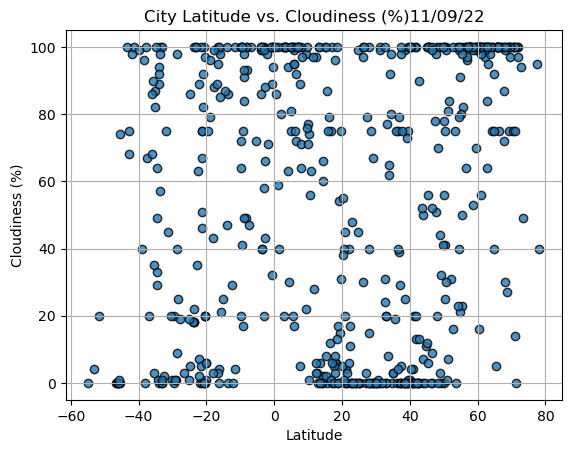

In [22]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

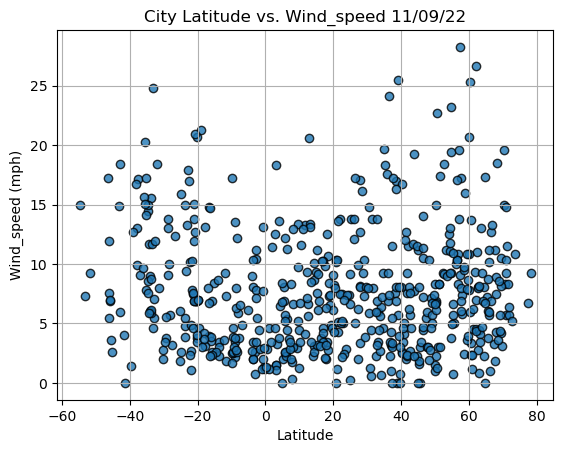

In [23]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.ylabel("Wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

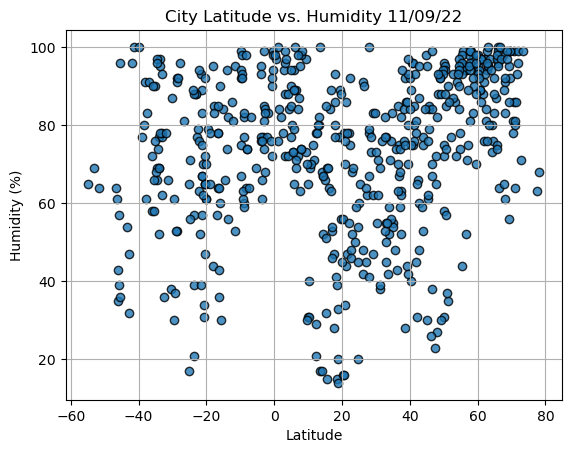

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [26]:
# Create a new DataFrame from the current DataFrame
# Use loc method to get a specific row from a current DataFrame
index13 = new_city_data_order_df.loc[13]
index13

City                      Vaitape
Country                        PF
Date          2022-11-10 04:07:33
Lat                      -16.5167
Lng                       -151.75
Max Temp                    79.34
Humidity                       78
Cloudiness                    100
Wind Speed                  14.79
Name: 13, dtype: object

In [27]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
new_city_data_order_df ["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
560     True
561     True
562     True
563     True
564     True
Name: Lat, Length: 565, dtype: bool

In [28]:
new_city_data_order_df.loc[(new_city_data_order_df ["Lat"] >= 0)]. head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Chokurdakh,RU,2022-11-10 04:07:31,70.6333,147.9167,-9.63,99,100,8.32
7,Berlevag,NO,2022-11-10 04:07:31,70.8578,29.0864,33.80,86,100,5.75
8,Cabo San Lucas,MX,2022-11-10 04:06:13,22.8909,-109.9124,76.60,68,48,5.01
9,Lompoc,US,2022-11-10 04:07:32,34.6391,-120.4579,51.01,83,0,9.22
10,Harper,LR,2022-11-10 04:07:32,4.3750,-7.7169,77.20,84,30,6.46


In [29]:
# Create Northern Hemisphere DataFrame
northern_hemi_df = new_city_data_order_df.loc[(new_city_data_order_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Chokurdakh,RU,2022-11-10 04:07:31,70.6333,147.9167,-9.63,99,100,8.32
7,Berlevag,NO,2022-11-10 04:07:31,70.8578,29.0864,33.80,86,100,5.75
8,Cabo San Lucas,MX,2022-11-10 04:06:13,22.8909,-109.9124,76.60,68,48,5.01
9,Lompoc,US,2022-11-10 04:07:32,34.6391,-120.4579,51.01,83,0,9.22
10,Harper,LR,2022-11-10 04:07:32,4.3750,-7.7169,77.20,84,30,6.46


In [30]:
# Create Southern Hemisphere DataFrame
southern_hemi_df = new_city_data_order_df.loc[(new_city_data_order_df["Lat"] < 0)]
southern_hemi_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-11-10 04:07:29,-21.2000,-175.2000,78.96,89,75,6.91
1,Bluff,NZ,2022-11-10 04:07:30,-46.6000,168.3333,58.80,64,0,17.20
2,Mahebourg,MU,2022-11-10 04:04:41,-20.4081,57.7000,78.26,65,20,6.91
3,Kaitangata,NZ,2022-11-10 04:07:30,-46.2817,169.8464,55.99,61,0,11.97
4,Cape Town,ZA,2022-11-10 04:02:21,-33.9258,18.4232,60.91,69,0,8.99


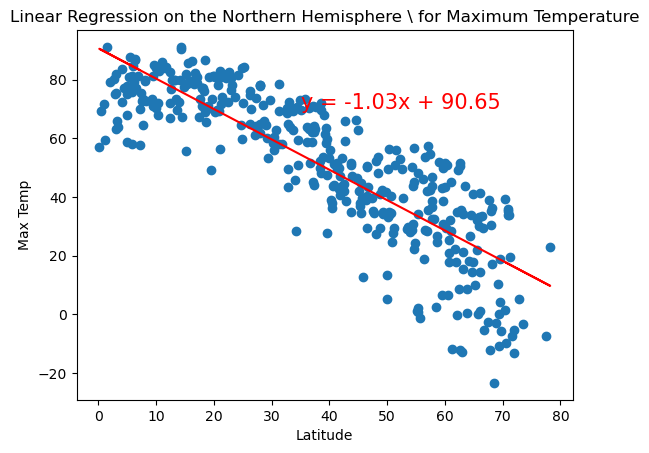

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
# Linear regression on the Norhtern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Max Temperature")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (35,70))

# Save the figure.
plt.savefig("weather_data/Fig5.png")


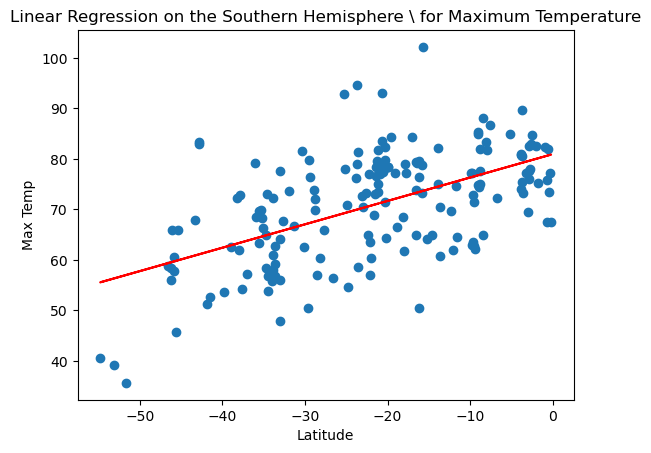

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
# Linear regression on the Norhtern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Max Temperature")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp', (35,70))

# Save the figure.
plt.savefig("weather_data/Fig6.png")

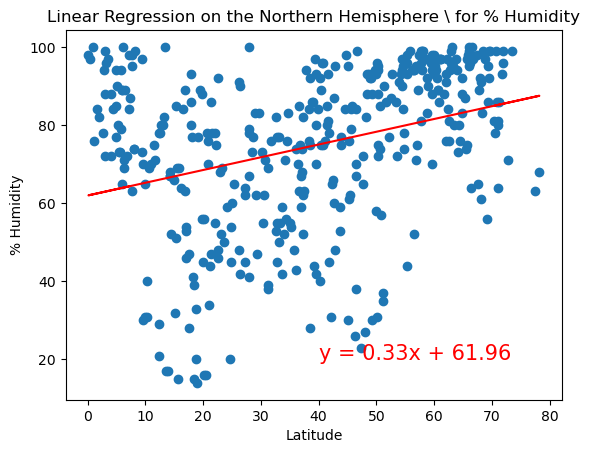

<Figure size 640x480 with 0 Axes>

In [33]:
# Linear regression on the Norhtern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Humidity")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,20))

# Save the figure.
plt.savefig("weather_data/Fig7.png")

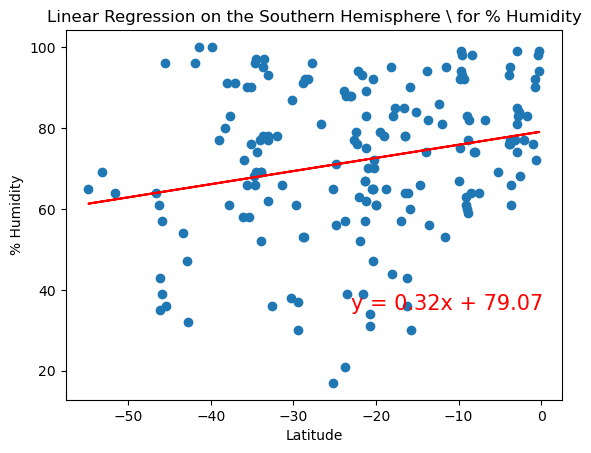

<Figure size 640x480 with 0 Axes>

In [34]:
# Linear regression on the Norhtern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Humidity")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity', (-23,35))

# Save the figure.
plt.savefig("weather_data/Fig8.png")

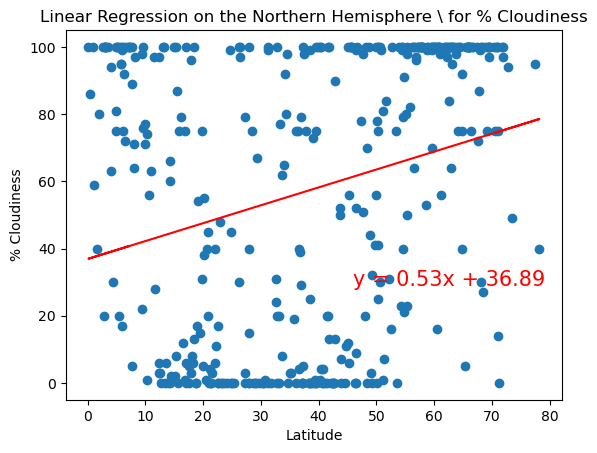

<Figure size 640x480 with 0 Axes>

In [35]:
# Linear regression on the Norhtern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for % Cloudiness")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness', (46,29))

# Save the figure.
plt.savefig("weather_data/Fig9.png")

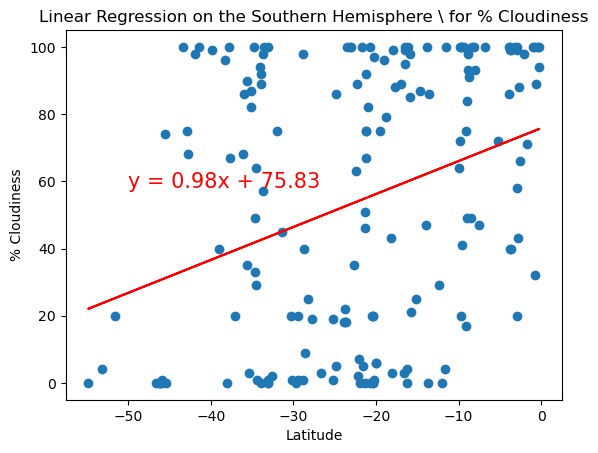

<Figure size 640x480 with 0 Axes>

In [36]:
# Linear regression on the Norhtern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for % Cloudiness")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness', (-50,58))

# Save the figure.
plt.savefig("weather_data/Fig10.png")

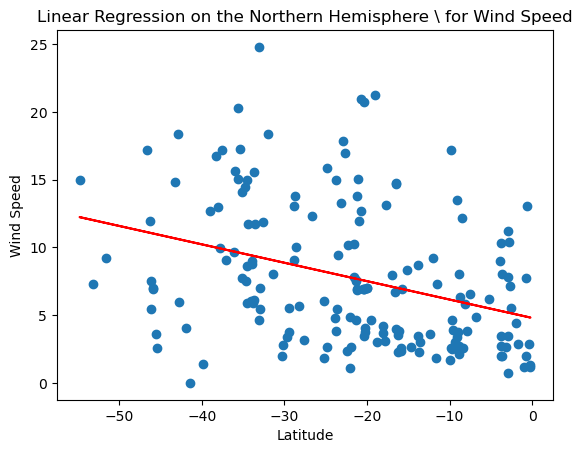

<Figure size 640x480 with 0 Axes>

In [37]:
# Linear regression on the Norhtern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Northern Hemisphere \n for Wind Speed")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed', (-22,29))

# Save the figure.
plt.savefig("weather_data/Fig11.png")

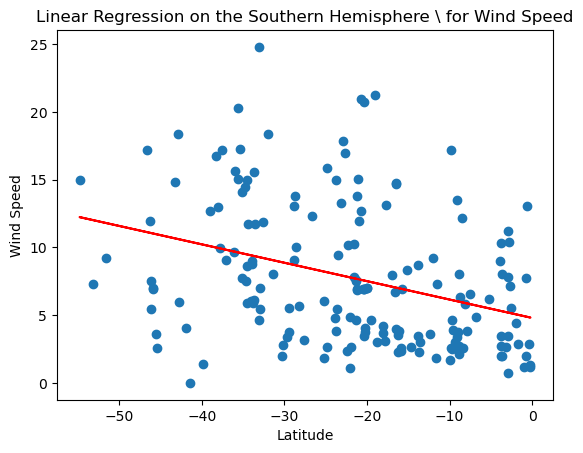

<Figure size 640x480 with 0 Axes>

In [38]:
# Linear regression on the Norhtern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title(f"Linear Regression on the Southern Hemisphere \n for Wind Speed")

#Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed', (-22,29))

# Save the figure.
plt.savefig("weather_data/Fig12.png")